基本程式設定

In [1]:
from scipy.integrate import odeint
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [2]:
# start : 2020/2/20
# end  : 2021/7/7

Totaldays = 504
real_Total_Infected = [0, 1, 1, 1, 1, 1, 2, 3, 6, 6, 7, 12, 15, 15, 21, 37, 47, 56, 60, 88, 60, 81, 112, 138, 177, 251, 295, 371, 386, 628, 843, 1080, 1249, 1351, 2468, 2988, 3421, 3901, 4433, 4979, 5717, 6413, 7132, 7729, 8157, 8740, 9191, 9568, 9906, 10249, 10607, 10952, 11504, 11942, 12341, 12652, 12948, 13246, 13537, 13813, 14112, 14394, 14619, 14895, 15143, 15302, 15385, 15513, 15672, 15754, 15896, 16012, 16069, 16096, 16149, 16181, 16246, 16307, 16340, 16359, 16388, 16427, 16450, 16489, 16511, 16523, 16528, 16543, 16570, 16592, 16607, 16624, 16643, 16648, 16661, 16683, 16733, 16773, 16850, 16963, 16992, 17079, 17179, 17300, 17397, 17539, 17666, 17744, 17884, 18063, 18236, 18476, 18667, 18851, 19000, 19136, 19334, 19634, 19905, 20207, 20517, 20676, 20849, 21194, 21645, 22132, 22648, 23112, 23510, 23895, 24652, 25438, 26410, 27556, 28495, 29316, 30147, 31281, 32671, 33998, 35523, 36932, 38100, 39338, 41058, 42662, 44539, 46478, 48083, 49531, 50547, 52434, 54440, 56484, 58474, 60304, 61416, 62458, 64506, 66631, 68585, 70372, 71734, 72359, 73067, 74867, 76596, 78286, 79963, 81727, 82481, 83405, 85109, 86932, 88554, 90197, 91585, 92342, 93410, 95060, 96709, 98349, 99836, 101329, 102040, 103005, 104905, 106861, 108814, 110885, 112717, 113627, 114728, 116906, 119158, 122351, 125012, 127635, 129140, 131317, 134705, 138194, 142190, 146351, 150326, 153045, 156220, 161025, 166564, 171138, 176523, 181863, 185672, 188251, 192117, 199138, 206263, 214497, 222887, 228769, 232183, 233342, 238333, 247411, 255142, 262200, 264793, 267730, 273451, 278175, 282340, 286095, 289058, 289974, 291620, 294789, 297125, 299242, 300854, 302354, 302765, 303687, 305204, 306397, 307569, 308601, 309450, 309696, 310303, 311187, 312074, 312797, 313441, 314121, 314349, 315007, 315795, 316641, 317410, 317980, 318671, 318883, 319417, 320136, 320811, 321574, 322410, 323171, 323463, 324088, 324961, 325790, 326585, 327355, 328129, 328551, 329316, 330275, 331132, 332211, 333296, 334328, 334908, 335933, 337191, 338389, 339968, 341406, 342101, 343826, 344906, 346797, 348285, 350271, 352397, 353269, 355786, 357176, 359506, 360630, 365042, 367975, 370152, 372886, 374760, 378259, 382487, 385022, 389678, 394391, 398664, 401470, 407285, 412398, 416584, 423262, 428510, 434799, 441542, 448173, 456139, 463448, 471048, 477357, 485434, 491319, 501073, 510063, 520060, 529814, 535049, 543499, 551689, 558249, 565629, 575842, 582869, 589028, 593961, 597403, 601069, 609656, 621590, 628895, 633991, 638789, 643435, 652246, 659978, 668874, 675618, 680856, 685583, 692101, 696528, 703719, 709729, 714812, 718746, 721846, 724380, 730293, 734575, 738629, 741934, 744513, 744513, 750043, 754998, 759572, 763756, 767726, 770780, 773335, 775807, 779958, 785218, 789485, 793407, 796465, 799727, 801575, 805116, 808262, 811492, 814250, 816198, 817799, 818977, 820913, 822703, 824178, 825562, 826609, 827220, 827772, 828764, 829689, 830028, 830845, 831383, 831383, 831924, 832125, 832639, 833105, 833456, 833707, 834070, 834247, 834603, 834920, 835216, 835486, 835674, 835813, 835933, 836158, 836334, 836590, 836902, 836936, 836883, 837047, 837218, 837357, 837492, 837807, 837892, 837974, 838024, 838107, 838217, 838323, 838407, 838481, 838481, 838554, 838621, 838697, 838767, 838828, 838858, 838886, 838894, 838957, 839000, 839030, 839059, 839079, 839118, 839119, 839159, 839167, 839221, 839263, 839290, 839308, 839319, 839367, 839389, 839408, 839420, 839433, 839453, 839458, 839475, 839511, 839517, 839532, 839539, 839566, 839571, 839585, 839585, 839585, 839630, 839653, 839661, 839666, 839690, 839701, 839720, 839747, 839769, 839830, 839867, 839990, 840079, 840225, 840444, 840638, 840823, 840888, 841196, 841486, 841777, 842067, 842371, 842648, 842969, 843465, 843892, 844378]
real_Total_Deaths = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 4, 5, 10, 12, 13, 16, 17, 21, 29, 38, 43, 49, 56, 64, 72, 80, 89, 97, 103, 109, 118, 126, 139, 146, 155, 166, 174, 180, 189, 192, 196, 199, 202, 204, 208, 213, 219, 225, 229, 232, 235, 238, 240, 241, 242, 248, 251, 255, 260, 263, 266, 268, 268, 271, 275, 278, 280, 281, 281, 281, 281, 282, 284, 284, 286, 287, 287, 287, 287, 290, 292, 293, 293, 294, 298, 300, 300, 301, 302, 302, 302, 303, 305, 305, 306, 306, 306, 307, 308, 308, 309, 311, 314, 318, 321, 324, 326, 326, 327, 330, 331, 334, 339, 341, 349, 354, 359, 364, 368, 373, 380, 384, 391, 397, 406, 418, 426, 436, 448, 457, 463, 479, 487, 494, 505, 512, 520, 535, 550, 564, 578, 589, 604, 615, 625, 634, 646, 659, 666, 681, 692, 707, 723, 735, 745, 764, 768, 782, 794, 806, 819, 829, 842, 858, 877, 888, 899, 911, 916, 930, 953, 968, 982, 998, 1010, 1025, 1037, 1054, 1074, 1089, 1103, 1123, 1138, 1155, 1175, 1191, 1217, 1235, 1255, 1282, 1303, 1334, 1360, 1385, 1416, 1446, 1471, 1503, 1532, 1567, 1604, 1650, 1675, 1712, 1748, 1775, 1820, 1846, 1893, 1933, 1968, 2014, 2044, 2082, 2117, 2148, 2182, 2214, 2247, 2278, 2298, 2323, 2352, 2378, 2405, 2440, 2468, 2496, 2506, 2525, 2536, 2561, 2580, 2596, 2622, 2639, 2652, 2668, 2676, 2683, 2689, 2699, 2706, 2718, 2723, 2735, 2744, 2751, 2763, 2770, 2778, 2784, 2796, 2813, 2820, 2826, 2831, 2840, 2846, 2856, 2864, 2872, 2882, 2886, 2895, 2896, 2909, 2917, 2924, 2932, 2934, 2961, 2969, 2983, 2999, 3004, 3014, 3034, 3050, 3057, 3074, 3099, 3111, 3136, 3150, 3171, 3186, 3210, 3226, 3256, 3292, 3307, 3325, 3356, 3392, 3416, 3445, 3496, 3529, 3552, 3596, 3645, 3671, 3704, 3771, 3817, 3870, 3910, 3959, 4005, 4044, 4080, 4181, 4245, 4266, 4341, 4419, 4498, 4513, 4605, 4669, 4700, 4738, 4796, 4816, 4887, 4948, 5001, 5020, 5071, 5121, 5171, 5216, 5257, 5283, 5304, 5351, 5388, 5414, 5441, 5473, 5509, 5526, 5526, 5577, 5596, 5634, 5660, 5687, 5697, 5732, 5752, 5760, 5790, 5803, 5822, 5834, 5856, 5891, 5917, 5933, 5950, 5967, 5980, 5988, 6011, 6030, 6048, 6057, 6069, 6073, 6082, 6092, 6109, 6122, 6154, 6163, 6165, 6165, 6185, 6197, 6193, 6209, 6220, 6220, 6236, 6243, 6248, 6257, 6266, 6279, 6280, 6292, 6296, 6304, 6309, 6312, 6315, 6316, 6331, 6335, 6341, 6345, 6346, 6346, 6346, 6350, 6352, 6353, 6359, 6361, 6362, 6363, 6363, 6366, 6367, 6369, 6370, 6374, 6375, 6376, 6377, 6378, 6378, 6379, 6379, 6380, 6381, 6382, 6389, 6392, 6395, 6396, 6397, 6397, 6404, 6406, 6406, 6406, 6406, 6407, 6407, 6411, 6412, 6413, 6415, 6416, 6417, 6418, 6418, 6418, 6418, 6418, 6428, 6428, 6428, 6430, 6428, 6428, 6428, 6427, 6427, 6427, 6427, 6427, 6428, 6428, 6429, 6429, 6429, 6429, 6429, 6429, 6429, 6429, 6429, 6429, 6428, 6429, 6429, 6429]
real_New_Infected = []
real_New_Deaths = []
for i in range(Totaldays):
  real_New_Infected.append(real_Total_Infected[i]-real_Total_Infected[i-1])
  real_New_Deaths.append(real_Total_Deaths[i]-real_Total_Deaths[i-1])
real_New_Infected[0] = real_Total_Infected[0]
real_New_Deaths[0] = real_Total_Deaths[0]

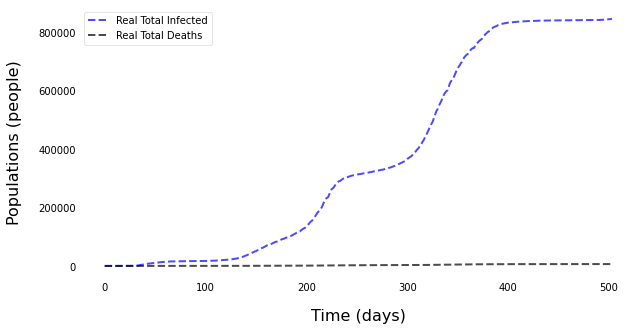

In [3]:
# show the entire curve -- accumulated
t = list(range(Totaldays))

f1, ax1 = plt.subplots(1, 1, figsize=(10,5))

ax1.plot(t, real_Total_Infected, 'b--', alpha=0.7, linewidth=2, label='Real Total Infected')
ax1.plot(t, real_Total_Deaths, 'k--', alpha=0.7, linewidth=2, label='Real Total Deaths')

ax1.set_xlabel('Time (days)', labelpad=16, size=16)
ax1.set_ylabel('Populations (people)', labelpad=16, size=16)

ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)
ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax1.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
  ax1.spines[spine].set_visible(False)
plt.show()

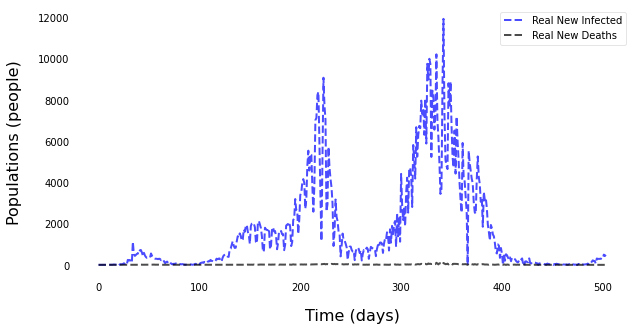

In [4]:
# show the entire curve -- daily new
t = list(range(Totaldays))

f1, ax1 = plt.subplots(1, 1, figsize=(10,5))

ax1.plot(t, real_New_Infected, 'b--', alpha=0.7, linewidth=2, label='Real New Infected')
ax1.plot(t, real_New_Deaths, 'k--', alpha=0.7, linewidth=2, label='Real New Deaths')

ax1.set_xlabel('Time (days)', labelpad=16, size=16)
ax1.set_ylabel('Populations (people)', labelpad=16, size=16)

ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)
ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax1.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
  ax1.spines[spine].set_visible(False)
plt.show()

In [5]:
start = 270
end = 480
days = end - start
real_Total_Infected = real_Total_Infected[start:end]
real_Total_Deaths = real_Total_Deaths[start:end]
real_New_Infected = real_New_Infected[start:end]
real_New_Deaths = real_New_Deaths[start:end]
# https://ourworldindata.org/coronavirus

N = 8792500
# https://worldpopulationreview.com/countries/israel-population

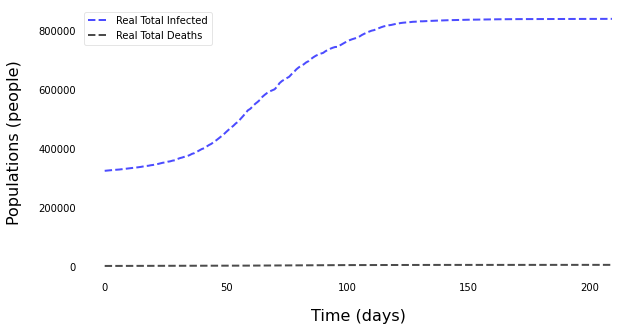

In [6]:
# show the cutted curve -- accumulated
t = list(range(end-start))

f1, ax1 = plt.subplots(1, 1, figsize=(10,5))

ax1.plot(t, real_Total_Infected, 'b--', alpha=0.7, linewidth=2, label='Real Total Infected')
ax1.plot(t, real_Total_Deaths, 'k--', alpha=0.7, linewidth=2, label='Real Total Deaths')

ax1.set_xlabel('Time (days)', labelpad=16, size=16)
ax1.set_ylabel('Populations (people)', labelpad=16, size=16)

ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)
ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax1.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
  ax1.spines[spine].set_visible(False)
plt.show()

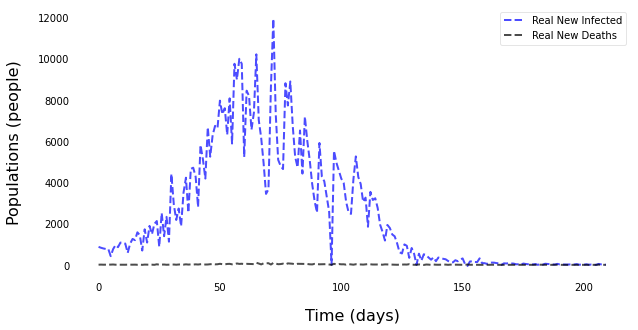

In [7]:
# show the cutted curve -- daily new
t = list(range(end-start))

f1, ax1 = plt.subplots(1, 1, figsize=(10,5))

ax1.plot(t, real_New_Infected, 'b--', alpha=0.7, linewidth=2, label='Real New Infected')
ax1.plot(t, real_New_Deaths, 'k--', alpha=0.7, linewidth=2, label='Real New Deaths')

ax1.set_xlabel('Time (days)', labelpad=16, size=16)
ax1.set_ylabel('Populations (people)', labelpad=16, size=16)

ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)
ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax1.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
  ax1.spines[spine].set_visible(False)
plt.show()

作圖程式 - 基本模型

In [8]:
def plot_SIHRD(t, S, I, H, R, D, show = ['S', 'I', 'H', 'R', 'D', 'pTI', 'pTD', 'rTI', 'rTD']):
  predicted_Total_Infected = []
  for i in range(days):
    predicted_Total_Infected.append(H[i]+R[i]+D[i])
  
  if ('S' in show) or ('I' in show) or ('R' in show) or ('H' in show) or ('D' in show):
    f, ax = plt.subplots(1,1,figsize=(10,5))
    if 'S' in show:
      ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    if 'I' in show:
      ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    if 'H' in show:
      ax.plot(t, H, 'y', alpha=0.7, linewidth=2, label='Hospitalized')
    if 'R' in show:
      ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    if 'D' in show:
      ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')

    ax.set_xlabel('Time (days)', labelpad=16, size=16)
    ax.set_ylabel('Populations (people)', labelpad=16, size=16)

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show();

  if ('rTI' in show) or ('rTD' in show) or ('pTI' in show) or ('pTD' in show):
    f1, ax1 = plt.subplots(1,1,figsize=(10,5))

    if 'rTI' in show:
      ax1.plot(t, real_Total_Infected, 'b--', alpha=0.7, linewidth=2, label='Real Total Infected')
    if 'rTD' in show:
      ax1.plot(t, real_Total_Deaths, 'k--', alpha=0.7, linewidth=2, label='Real Total Deaths')
    
    if 'pTI' in show:
      ax1.plot(t, predicted_Total_Infected, 'b', alpha=0.7, linewidth=2, label='Predicted Total Infected')  
    if 'pTD' in show:
      ax1.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Predicted Total Deaths')

    ax1.set_xlabel('Time (days)', labelpad=16, size=16)
    ax1.set_ylabel('Populations (people)', labelpad=16, size=16)

    ax1.yaxis.set_tick_params(length=0)
    ax1.xaxis.set_tick_params(length=0)
    ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax1.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax1.spines[spine].set_visible(False)
    plt.show();

模擬程式 - 基本模型

In [9]:
def get_diff_SIHRD(populations, alpha, beta, r_I, r_H, eta):
    (S, I, H, R, D) = populations
    n = N - H - D

    dS = -alpha * S * I / n
    dI = alpha * S * I / n - beta * I - r_I *I
    dH = beta * I - r_H * H - eta * H
    dR = r_I *I + r_H * H
    dD = eta * H
    return (dS, dI, dH, dR, dD)

def mimic_SIHRD(days, initial, alpha, beta, r_I, r_H, eta):
  t = np.linspace(0, days-1, days)
  [S0, I0, H0, R0, D0] = initial

  S = [S0]
  I = [I0]
  H = [H0]
  R = [R0]
  D = [D0]
  for i in range(days-1):
    populations = [S[-1],I[-1],H[-1],R[-1],D[-1]]
    (dS, dI, dH, dR, dD) = get_diff_SIHRD(populations, alpha, beta, r_I, r_H, eta)
    S.append(S[-1]+dS)
    I.append(I[-1]+dI)
    H.append(H[-1]+dH)
    R.append(R[-1]+dR)
    D.append(D[-1]+dD)

  return (t, S, I, H, R, D) 

加入疫苗

In [10]:
raw_vaccine_1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 7373, 24884, 44614, 62829, 73327, 38450, 32573, 104370, 134805, 155946, 152724, 158174, 71234, 71626, 149401, 151837, 124854, 103074, 115823, 66294, 44455, 37537, 21013, 23905, 51919, 56302, 30615, 29367, 68252, 69526, 72574, 76533, 69581, 37713, 39848, 68938, 80735, 78479, 77690, 79409, 36522, 34287, 73178, 82271, 69863, 60072, 72386, 33777, 21533, 53939, 58481, 66120, 70337, 80892, 38936, 27388, 74728, 81320, 83319, 61795, 68975, 39559, 31584, 79313, 84875, 77193, 60875, 51506, 25753, 18256, 40165, 45509, 41004, 41783, 39474, 17166, 10567, 30965, 27162, 26498, 23090, 23057, 11096, 7848, 20829, 19903, 18531, 17502, 15826, 6752, 5117, 13030, 13354, 2601, 10787, 10035, 4005, 1710, 2039, 6775, 7659, 7948, 7944, 2768, 1339, 9539, 10173, 8770, 8673, 9162, 3369, 1491, 8894, 8701, 5597, 3426, 450, 3189, 743, 6964, 6204, 6043, 6150, 5742, 2584, 679, 4716, 5331, 4346, 4310, 4191, 1731, 382, 3156, 3399, 3382, 3109, 3437, 1661, 175, 2763, 2764, 2414, 1816, 1814, 770, 132, 425, 187, 1815, 2030, 2093, 1007, 139, 2196, 1978, 1648, 1218, 1634, 616, 104, 1546, 1522, 1176, 1288, 1503, 924, 103, 4178, 4218, 3551, 3453, 3184, 1239, 137, 3030, 2877, 2946, 2558, 2534, 1075, 141, 3216, 5030, 6716, 10570, 11841, 6915, 2185, 13511, 14316, 16497, 16270, 16664, 9656, 2588, 17616, 17611, 17661, 15212]
raw_vaccine_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 3, 22, 5986, 19237, 35638, 56812, 68754, 35882, 25977, 84457, 120213, 137526, 143397, 163957, 70924, 53475, 140338, 139170, 126066, 124722, 130292, 64610, 42662, 59341, 35207, 30948, 51269, 57920, 28656, 22140, 68543, 65202, 67276, 71946, 71533, 37409, 30345, 68870, 75489, 78039, 75337, 79493, 37991, 28643, 78344, 80351, 70228, 62870, 64541, 31886, 21127, 55711, 61265, 64521, 66559, 78847, 40322, 25277, 72678, 73078, 76476, 58503, 68883, 41295, 25181, 73827, 78050, 71354, 58832, 57962, 27868, 15226, 40364, 40370, 7154, 46349, 35253, 13216, 4200, 4548, 29856, 22230, 19249, 18467, 7964, 2878, 22714, 21080, 16552, 15090, 16746, 6053, 3429, 14094, 13023, 4780, 5109, 413, 6458, 1912, 7351, 6968, 6685, 6900, 7467, 3232, 1211, 6825, 7724, 6415, 7094, 7085, 3000, 820, 5951, 5630, 4528, 3862, 2920, 2281, 423, 4625, 4521, 3639, 3093, 3474, 1333, 173, 1134, 758, 4798, 4875, 3715, 1223, 323, 3120, 3460, 2437, 2324, 2942, 1240, 161, 1845, 1947, 1664, 1427, 1290, 546, 66, 873, 664, 1017, 1127, 1122, 405, 89, 1165, 1348, 1181, 828, 1009, 332, 78, 1211, 1054, 903, 1100, 1299, 766, 109, 3286, 3468, 3511, 3183, 3184, 1395, 237, 3066, 2859, 3187, 2484]
vaccine_1 = []
vaccine_2 = []

delay = 14
vaccine_1 = [0]*delay + raw_vaccine_1
vaccine_2 = [0]*delay + raw_vaccine_2
vaccine_1 = vaccine_1[start:end]
vaccine_2 = vaccine_2[start:end]

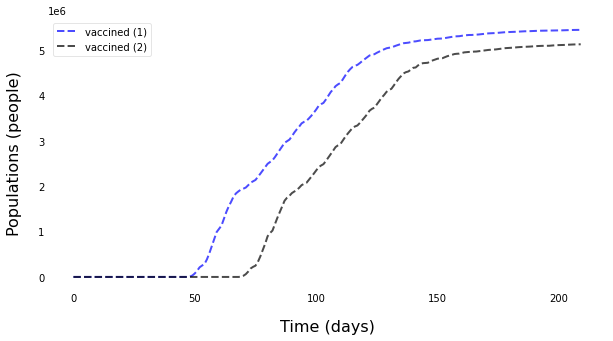

In [11]:
# show the entire curve -- accumulated
L1 = [vaccine_1[0]]
L2 = [vaccine_2[0]]
for i in range(1,days):
  L1.append(L1[-1] + vaccine_1[i])
  L2.append(L2[-1] + vaccine_2[i])

t = list(range(end-start))

f1, ax1 = plt.subplots(1, 1, figsize=(10,5))

ax1.plot(t, L1, 'b--', alpha=0.7, linewidth=2, label='vaccined (1)')
ax1.plot(t, L2, 'k--', alpha=0.7, linewidth=2, label='vaccined (2)')

ax1.set_xlabel('Time (days)', labelpad=16, size=16)
ax1.set_ylabel('Populations (people)', labelpad=16, size=16)

ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)
ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax1.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
  ax1.spines[spine].set_visible(False)
plt.show()

In [12]:
def mimic_SIHRD_V(days, initial, alpha, beta, r_I, r_H, eta, v1, v2):
  t = np.linspace(0, days-1, days)
  [S0, I0, H0, R0, D0] = initial

  V = [vaccine_1[0]*v1 + vaccine_2[0]*v2]
  S = [S0 - V[0]]
  I = [I0]
  H = [H0]
  R = [R0]
  D = [D0]
  
  for i in range(days-1):
    populations = [S[-1],I[-1],H[-1],R[-1],D[-1]]
    (dS, dI, dH, dR, dD) = get_diff_SIHRD(populations, alpha, beta, r_I, r_H, eta)
    dV = ((vaccine_1[i] * v1)  +  (vaccine_2[i] * v2) ) * (S[-1]/(S[-1]+I[-1]))
    dS = dS - dV
    V.append(V[-1]+dV)
    S.append(S[-1]+dS)
    I.append(I[-1]+dI)
    H.append(H[-1]+dH)
    R.append(R[-1]+dR)
    D.append(D[-1]+dD)

  return (t, V, S, I, H, R, D) #以陣列回傳

In [13]:
# inital value
alpha, beta, r_I, r_H, eta, I0, H0 = [0.19718919273183408, 0.0053667626702180934, 0.15501899599367053, 0.16169792465695165, 0.042596163599478695, 8098.402290109492, 0]

In [14]:
v1 = 0.46
v2 = 0.92 - 0.46

def error_function_SIHRD_V(parameters):
  global alpha, beta, r_I, r_H, eta, I0, H0, v1, v2, delay
  alpha = parameters[0]
  beta = parameters[1]
  r_I = parameters[2]
  r_H = parameters[3]
  eta = parameters[4]
  I0 = parameters[5]
  H0 = parameters[6]

  D0 = real_Total_Deaths[0]
  R0 = real_Total_Infected[0] - H0 - D0
  S0 = N - I0 - H0 - R0 - D0
  
  #(S0, I0, H0, R0, D0) = (N-100, 100, 0, 308500, real_Total_Deaths[0])  #初始條件
  (t, V, S, I, H, R, D) = mimic_SIHRD_V(days, [S0, I0, H0, R0, D0], alpha, beta, r_I, r_H, eta, v1, v2)

  predicted_Total_Infected = []
  for i in range(days):
    predicted_Total_Infected.append(H[i]+R[i]+D[i])

  error = 0
  for i in range(days):
    error += (real_Total_Infected[i]-predicted_Total_Infected[i])**2
    error += (real_Total_Deaths[i]-D[i])**2 *100000

  for i in parameters[:5]:
    error += int(i<0.00)*(0.0-i+1)**2*10000000000000000

  error += int(parameters[2]>parameters[3])*(parameters[2]-parameters[3]+1)**2*10000000000000000  # r_I < r_H
  
  for i in parameters[5:7]:
    error += int(i<0.00)*(0.0-i+1)**2*10000000000000000
  return error

for i in range(3):
  Result = minimize(error_function_SIHRD_V, [alpha, beta, r_I, r_H, eta, I0, H0], method = 'Nelder-Mead', options={'maxiter':3e3})
  print(i, int(Result.fun/1e9), Result.fun, list(Result.x))
print()
print(Result)
[alpha, beta, r_I, r_H, eta, I0, H0] = list(Result.x)

0 134 134060823359.26672 [0.19697998083352808, 0.005240876640402117, 0.1549612529585263, 0.16107503843403165, 0.04366181093200884, 8111.533303762264, 5.014141415866959e-10]
1 134 134053507454.614 [0.19709018975782233, 0.004644714617033986, 0.15564301853463833, 0.15564301853479262, 0.04935337814077416, 8099.878179054547, 3.7397072778684474e-07]
2 134 134053507440.76895 [0.19709018696631853, 0.004644714933741322, 0.1556430174215955, 0.15564301742262815, 0.049353380585020284, 8099.878144959776, 2.4818277155398995e-11]

 final_simplex: (array([[1.97090187e-01, 4.64471493e-03, 1.55643017e-01, 1.55643017e-01,
        4.93533806e-02, 8.09987814e+03, 2.48182772e-11],
       [1.97090187e-01, 4.64471493e-03, 1.55643017e-01, 1.55643017e-01,
        4.93533806e-02, 8.09987814e+03, 2.48182772e-11],
       [1.97090187e-01, 4.64471493e-03, 1.55643017e-01, 1.55643017e-01,
        4.93533806e-02, 8.09987814e+03, 2.48182772e-11],
       [1.97090187e-01, 4.64471493e-03, 1.55643017e-01, 1.55643017e-01,
  

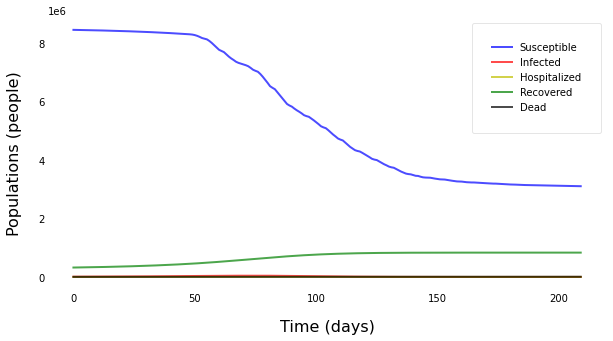

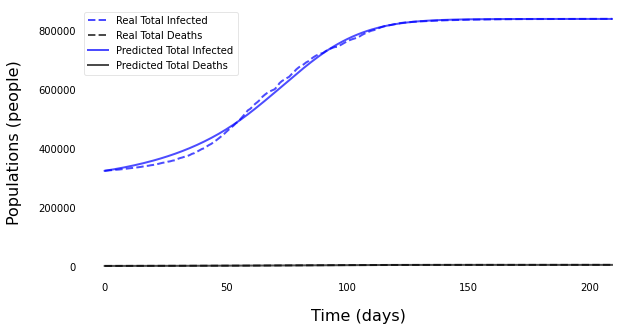

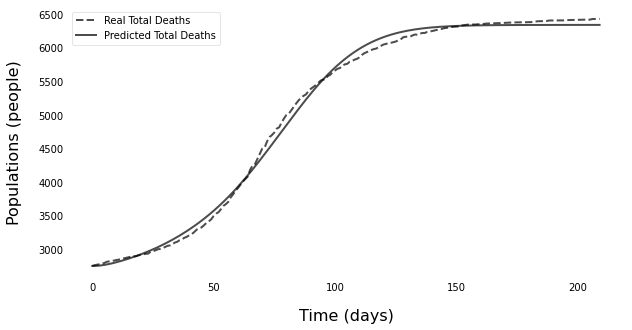

In [15]:
v1 = 0.46
v2 = 0.92 - 0.46
alpha, beta, r_I, r_H, eta, I0, H0 = [0.19718919273183408, 0.0053667626702180934, 0.15501899599367053, 0.16169792465695165, 0.042596163599478695, 8098.402290109492, 0]

D0 = real_Total_Deaths[0]
R0 = real_Total_Infected[0] - H0 - D0
S0 = N - I0 - H0 - R0 - D0
(t, V, S, I, H, R, D) = mimic_SIHRD_V(days, [S0, I0, H0, R0, D0], alpha, beta, r_I, r_H, eta, v1, v2)
plot_SIHRD(t, S, I, H, R, D)
plot_SIHRD(t, S, I, H, R, D, show = ['pTD', 'rTD'])

#S = V
#plot_SIHRD(t, S, I, H, R, D, show = ['S'])

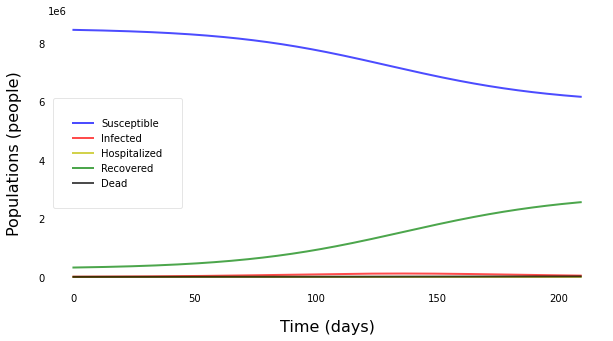

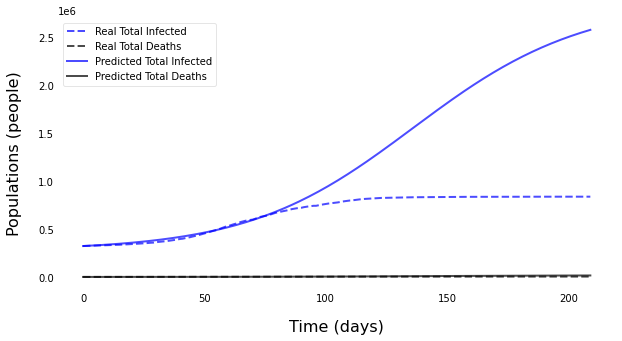

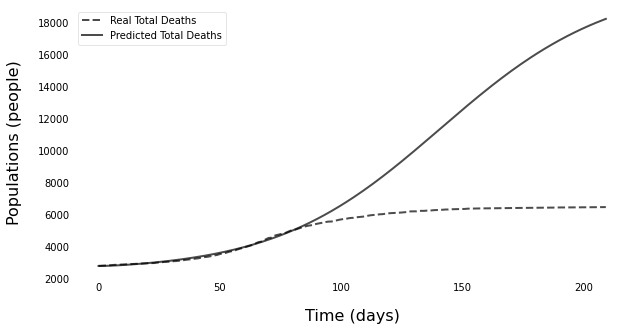

In [16]:
# without vaccine
v1 = 0
v2 = 0
alpha, beta, r_I, r_H, eta, I0, H0 = [0.19718919273183408, 0.0053667626702180934, 0.15501899599367053, 0.16169792465695165, 0.042596163599478695, 8098.402290109492, 0]

D0 = real_Total_Deaths[0]
R0 = real_Total_Infected[0] - H0 - D0
S0 = N - I0 - H0 - R0 - D0
(t, V, S, I, H, R, D) = mimic_SIHRD_V(days, [S0, I0, H0, R0, D0], alpha, beta, r_I, r_H, eta, v1, v2)
plot_SIHRD(t, S, I, H, R, D)
plot_SIHRD(t, S, I, H, R, D, show = ['pTD', 'rTD'])

#S = V
#plot_SIHRD(t, S, I, H, R, D, show = ['S'])